# Projeto de Visualização de Dados de E-commerce


## Objetivo do Projeto

Este projeto tem como objetivo utilizar as bibliotecas **Matplotlib** e **Seaborn** para criar visualizações de dados relacionados às vendas de um E-commerce. O exercício consiste em criar os seguintes tipos de gráficos:

- Histograma  
- Gráfico de densidade  
- Gráfico de setores
- Gráfico de barras  
- Gráfico de dispersão  
- Mapa de calor  
- Gráfico de regressão  

Como o foco principal está no **aprendizado da criação de gráficos** com as bibliotecas citadas, os resultados obtidos nas visualizações **não serão discutidos**.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importação dos Dados

Carregamento dos dados e análise inicial para entender a estrutura, identificar valores nulos e explorar distribuições básicas.

In [ ]:
# Importação dos dados
caminho = '/content/ecommerce_preparados.csv'
df = pd.read_csv(caminho)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)
df.head()

,Unnamed: 0,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,Review2,Review3,Qtd_Vendidos,Preço,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
0,0,Pijama Cirurgico...,4.0,273.0,NaN,toronto uniforme...,poliéster,Sem gênero,não definido,"Preço justo , be...","Tamanho bom, cos...","Muito bom, só po...",+1000,69.90,0.629630,0.029969,NaN,0.100645,781,122,1,1000.0,0.002274,0.117326
1,1,Kit 10 Cuecas Bo...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são bo...,Pelo preço promo...,Serviram muito b...,+10mil,232.89,0.814815,0.334178,0.213115,0.378585,463,25,3,10000.0,0.042292,0.176444
2,2,Kit Com 10 Cueca...,4.7,5682.0,20.0,zorba,algodão,Masculino,não definido,O tecido é bom e...,Vendo comentário...,Produto não é ne...,+50mil,199.90,0.888889,0.625937,0.245902,0.322329,838,25,1,50000.0,0.009095,0.176444
3,3,Kit 10 Cuecas Bo...,4.6,1700.0,22.0,mash,algodão,Masculino,primavera/verão,As cuecas são bo...,E o tamanho cert...,Produto não pare...,+10mil,229.39,0.851852,0.187197,0.278689,0.372617,494,25,7,10000.0,0.010914,0.176444
4,4,Kit 3 Short Jean...,4.4,507.0,9.0,menina linda,jean,Feminino,primavera/verão,Estou encantada ...,"Recomendo, tecid...",Gostei muito dos...,+1000,129.20,0.777778,0.055751,0.065574,0.201767,509,74,7,1000.0,0.010005,0.025466


In [ ]:
# Seleciona colunas que serão utilizadas na análise
df = df[['Nota', 'N_Avaliações', 'Desconto', 'Gênero',
         'Temporada', 'Qtd_Vendidos', 'Preço']]

In [ ]:
# Informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nota          1559 non-null   float64
 1   N_Avaliações  1559 non-null   float64
 2   Desconto      874 non-null    float64
 3   Gênero        2120 non-null   object 
 4   Temporada     2199 non-null   object 
 5   Qtd_Vendidos  2199 non-null   object 
 6   Preço         1964 non-null   float64
dtypes: float64(4), object(3)
memory usage: 120.4+ KB


In [ ]:
# Estatística básica do DataFrame
df.describe()

,Nota,N_Avaliações,Desconto,Preço
count,1559.000000,1559.000000,874.000000,1964.000000
mean,4.560936,204.062219,15.457666,102.705713
std,0.362854,578.455265,10.929166,69.976425
min,2.300000,1.000000,5.000000,10.880000
25%,4.400000,8.000000,8.000000,50.192500
50%,4.600000,27.000000,11.000000,78.970000
75%,4.800000,119.500000,20.000000,139.152500
max,5.000000,9077.000000,66.000000,597.300000


Podemos observar que algumas categorias possuem **valores nulos**, que serão tratados posteriormente. Além disso, percebemos a possível existência de outliers, uma vez que os valores de **média estão muito distantes da mediana** nas variáveis **N_Avaliações** e **Preço**.

No entanto, como esse não é o foco do projeto, **não iremos nos aprofundar na análise de outliers** neste momento.


In [ ]:
# Verificação de dados únicos
df.nunique()

,0
Nota,25
N_Avaliações,345
Desconto,50
Gênero,13
Temporada,10
Qtd_Vendidos,14
Preço,1033


In [ ]:
# Verificação dos valores únicos
colunas = df.select_dtypes(include=['object']).columns
for coluna in colunas:
    print(f'Dados únicos de {coluna}: {df[coluna].unique()}\n')

Dados únicos de Gênero: ['Sem gênero' 'Masculino' 'Feminino' 'Sem gênero infantil' 'Meninas'
 'Bebês' 'Meninos' nan 'Unissex' 'short menina verao look mulher' 'Mulher'
 'roupa para gordinha pluss P ao 52' 'menino'
 'bermuda feminina brilho Blogueira']

Dados únicos de Temporada: ['não definido' 'outono/inverno' 'primavera/verão'
 'primavera-verão outono-inverno' '2021' 'outono-inverno'
 'primavera-verão - outono-inverno' 'primavera/verão/outono/inverno'
 'primavera/verão outono/inverno' 'primavera-verão']

Dados únicos de Qtd_Vendidos: ['+1000' '+10mil' '+50mil' '+100' '+50' '+500' 'Nenhum' '2' '+5' '+5mil'
 '3' '+25' '1' '4']



O conhecimento dos **valores únicos** é necessário para a definição de quais gráficos são mais adequados para cada variável.

Por exemplo, ao observar as variáveis categóricas, percebemos que muitas delas possuem **diversas categorias distintas**, o que pode dificultar a visualização e interpretação dos dados.

Por isso, essas variáveis serão tratadas posteriormente, agrupando categorias semelhantes quando necessário, de modo a facilitar a criação de gráficos mais claros e informativos.

## Tratamento de Dados

Correção de valores nulos, inconsistências e ajustes necessários para garantir a qualidade do conjunto de dados.

In [ ]:
# Define os valores nulos em 'Desconto' como 0
df['Desconto'] = df['Desconto'].fillna(0)

# Define os valores nulos em 'genero' como 'não informado'
df['Gênero'] = df['Gênero'].fillna('não informado')

# Remove linhas com valores nulos em 'Nota', 'N_Avaliações' e 'Preço'
df = df.dropna(subset=['Nota', 'N_Avaliações', 'Preço'])

# Exibe contagem de valores nulos para verificar a limpeza
df.isnull().sum()

,0
Nota,0
N_Avaliações,0
Desconto,0
Gênero,0
Temporada,0
Qtd_Vendidos,0
Preço,0


In [ ]:
# Padroniza os dados da colunas de texto para letras minúsculas
for coluna in colunas:
    df[coluna] = df[coluna].str.lower()

# Padroniza nomes das colunas em letras minúsculas
df.columns = df.columns.str.lower()

In [ ]:
# Padronizações na coluna 'temporada'
def formatar_temporada(x):
    if x == '2021':
        return 'não definido'
    elif x != 'não definido':
        return x.replace(' - ', '/').replace('-', '/').replace(' ', '/').strip()
    return x

df['temporada'] = df['temporada'].apply(formatar_temporada)

df['temporada'].value_counts()

,count
temporada,
não definido,708
primavera/verão,459
outono/inverno,206
primavera/verão/outono/inverno,34


In [ ]:
# Padronização na coluna 'gênero'
renomear_genero = {'unissex': ['sem gênero'],
                   'infantil': ['sem gênero infantil', 'bebês'],
                   'feminino': ['meninas', 'short menina verao look mulher',
                                'roupa para gordinha pluss p ao 52', 'bermuda feminina brilho blogueira'],
                   'masculino': ['meninos', 'menino']}

for genero, substituicoes in renomear_genero.items():
    df['gênero'] = df['gênero'].replace(substituicoes, genero)

df['gênero'].value_counts()

,count
gênero,
feminino,532
masculino,419
infantil,235
unissex,173
não informado,48


In [ ]:
# Padronização na coluna 'qtd_vendidos'
def formatar_vendidos(x):
    if x == 'Nenhum':
        return '0'
    else:
      return x.replace('+', '').replace('mil', '000').strip()
    return x

df['qtd_vendidos'] = df['qtd_vendidos'].apply(formatar_vendidos).astype(int)

df['qtd_vendidos'].value_counts()

,count
qtd_vendidos,
100,443
1000,283
50,171
500,137
25,129
5,91
5000,72
10000,63
50000,7


In [ ]:
# Conferência de dados nulos e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 2197
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nota          1407 non-null   float64
 1   n_avaliações  1407 non-null   float64
 2   desconto      1407 non-null   float64
 3   gênero        1407 non-null   object 
 4   temporada     1407 non-null   object 
 5   qtd_vendidos  1407 non-null   int64  
 6   preço         1407 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 87.9+ KB


In [ ]:
# Verificação do DataFrame atualizado
df.head()

,nota,n_avaliações,desconto,gênero,temporada,qtd_vendidos,preço
0,4.0,273.0,0.0,unissex,não definido,1000,69.90
1,4.5,3034.0,18.0,masculino,outono/inverno,10000,232.89
2,4.7,5682.0,20.0,masculino,não definido,50000,199.90
3,4.6,1700.0,22.0,masculino,primavera/verão,10000,229.39
4,4.4,507.0,9.0,feminino,primavera/verão,1000,129.20


## Visualização dos Dados

Criação de gráficos para explorar distribuições e identificar padrões.

Como já mencionado na introdução do projeto, o foco principal está na **criação de gráficos** com as bibliotecas Matplotlib e Seaborn.

Portanto, os resultados apresentados **não serão discutidos** nesse projeto, sendo utilizados apenas para o aprendizado e prática da criação de visualizações.

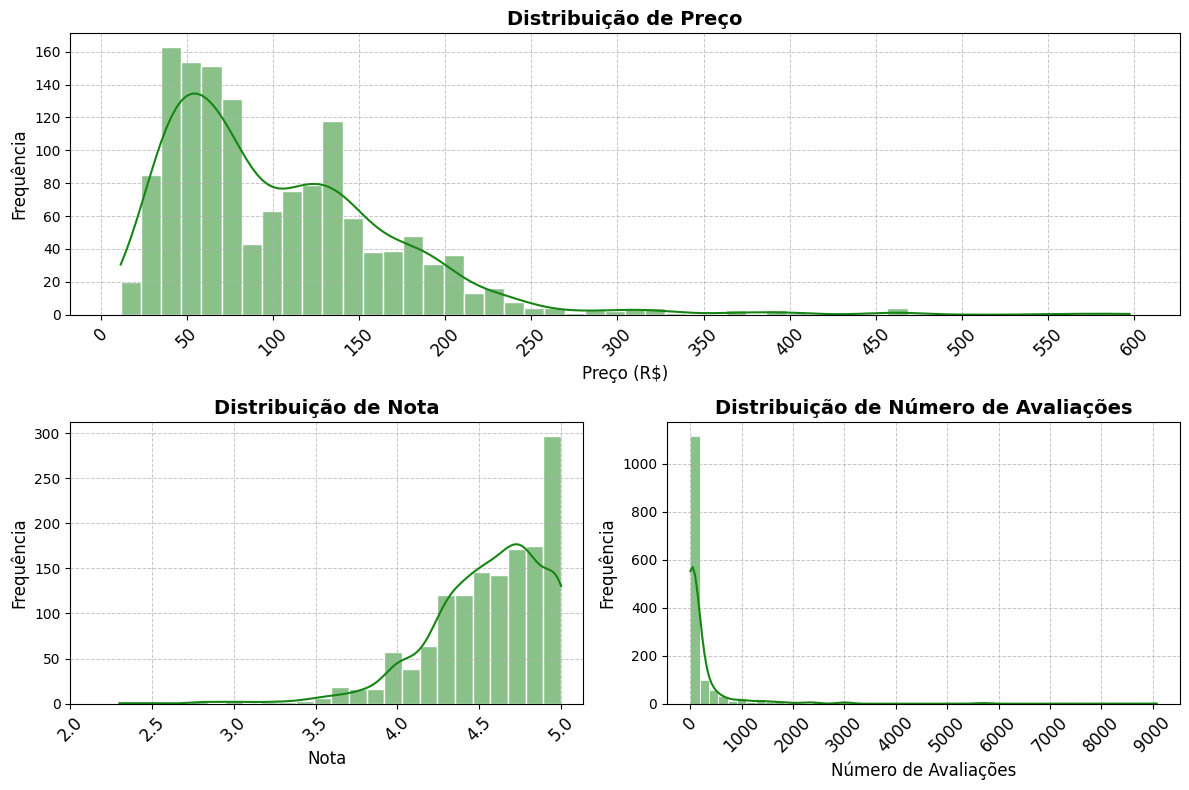

In [ ]:
# Histograma
plt.figure(figsize=(12, 8))

# Preço
plt.subplot(2, 1, 1)
sns.histplot(data=df, x='preço', kde=True, bins=50, color='#178515', edgecolor='white', alpha=0.5)
plt.title('Distribuição de Preço', fontsize=14, fontweight='bold')
plt.xlabel('Preço (R$)', fontsize=12, fontweight='medium')
plt.ylabel('Frequência', fontsize=12, fontweight='medium')
plt.xticks(ticks=range(0, int(df['preço'].max()) + 50, 50), rotation=45, fontsize=12)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Nota
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='nota', kde=True, bins=25, color='#178515', edgecolor='white', alpha=0.5)
plt.title('Distribuição de Nota', fontsize=14, fontweight='bold')
plt.xlabel('Nota', fontsize=12, fontweight='medium')
plt.ylabel('Frequência', fontsize=12, fontweight='medium')
plt.xticks(ticks=np.arange(2, df['nota'].max() + 0.5, 0.5), rotation=45, fontsize=12)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Número de avaliações
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='n_avaliações', kde=True, bins=50, color='#178515', edgecolor='white', alpha=0.5)
plt.title('Distribuição de Número de Avaliações', fontsize=14, fontweight='bold')
plt.xlabel('Número de Avaliações', fontsize=12, fontweight='medium')
plt.ylabel('Frequência', fontsize=12, fontweight='medium')
plt.xticks(ticks=range(0, int(df['n_avaliações'].max()) + 500, 1000), rotation=45, fontsize=12)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


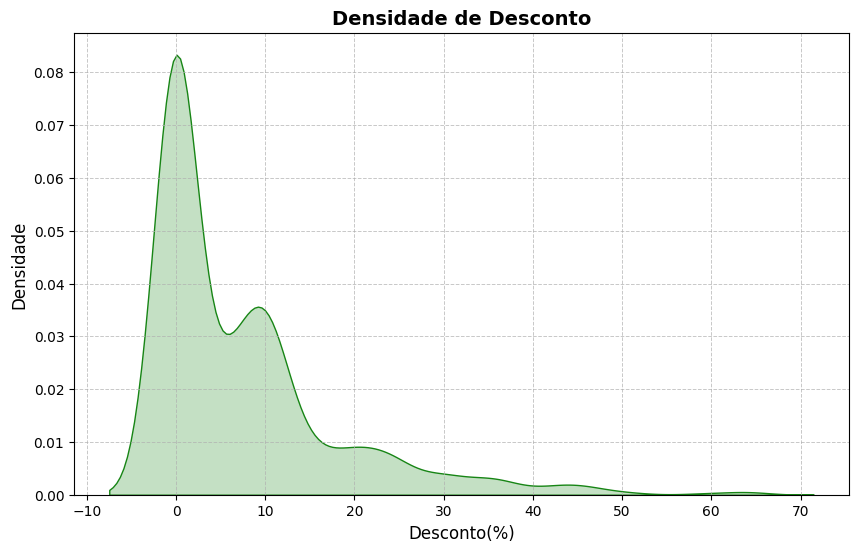

In [ ]:
# Gráfico de densidade
plt.figure(figsize=(10, 6))

# Desconto
sns.kdeplot(df['desconto'], fill=True, color='#178515')
plt.title('Densidade de Desconto', fontsize=14, fontweight='bold')
plt.xlabel('Desconto(%)', fontsize=12, fontweight='medium')
plt.ylabel('Densidade', fontsize=12, fontweight='medium')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

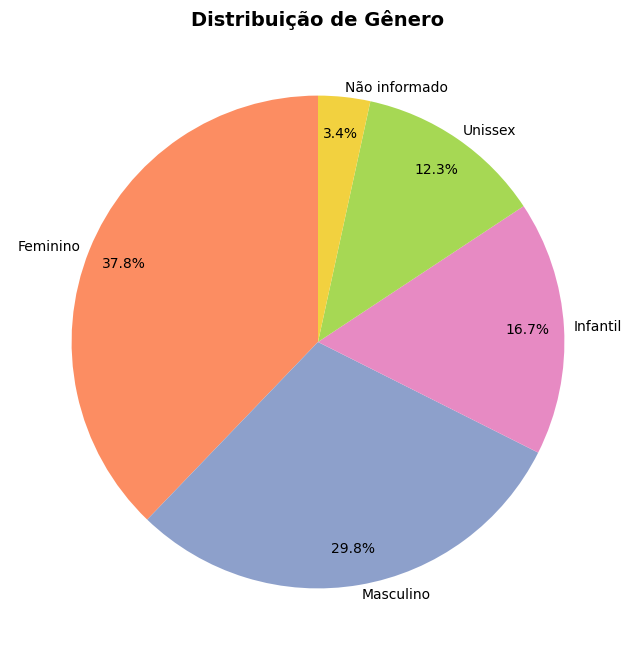

In [ ]:
# Gráfico de setores

# Gênero
labels = df['gênero'].value_counts().index.str.capitalize()
colors = '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#f2d13f'

plt.figure(figsize=(8, 8))

plt.pie(
    df['gênero'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',
    pctdistance=0.85,  # Afastamento do percentual
    labeldistance=1.04, # Afastamento dos rótulos
    startangle=90,
    colors=colors,
)
plt.title('Distribuição de Gênero', fontsize=14, fontweight='bold')

plt.show()


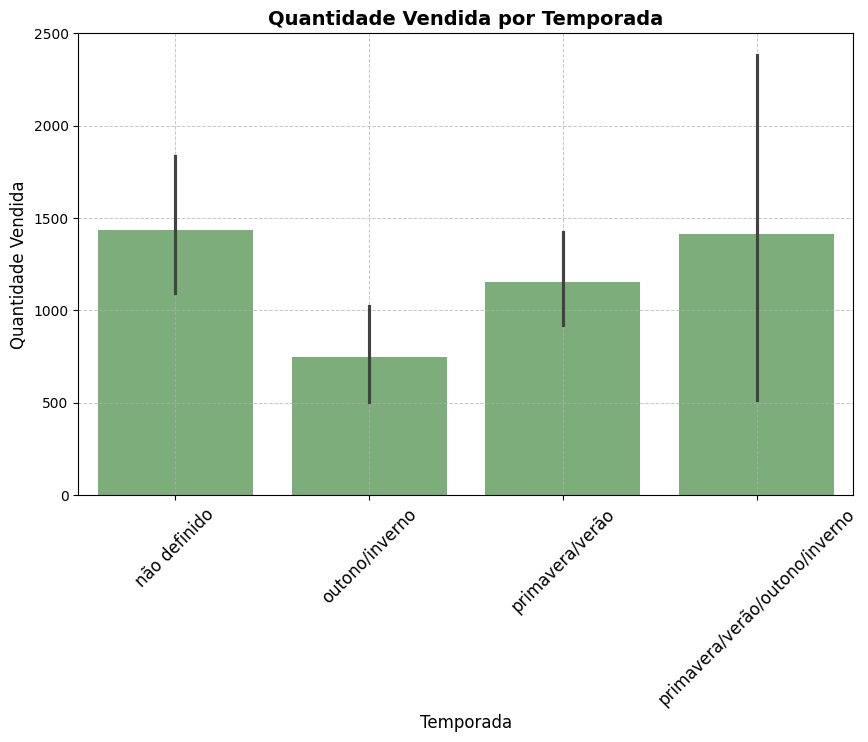

In [ ]:
# Gráfico de barras
# Temporada vs quantidade vendida
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='temporada', y='qtd_vendidos', color='#178515', alpha=0.6)
plt.title('Quantidade Vendida por Temporada', fontsize=14, fontweight='bold')
plt.xlabel('Temporada', fontsize=12, fontweight='medium')
plt.ylabel('Quantidade Vendida', fontsize=12, fontweight='medium')
plt.xticks(rotation=45, fontsize=12)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

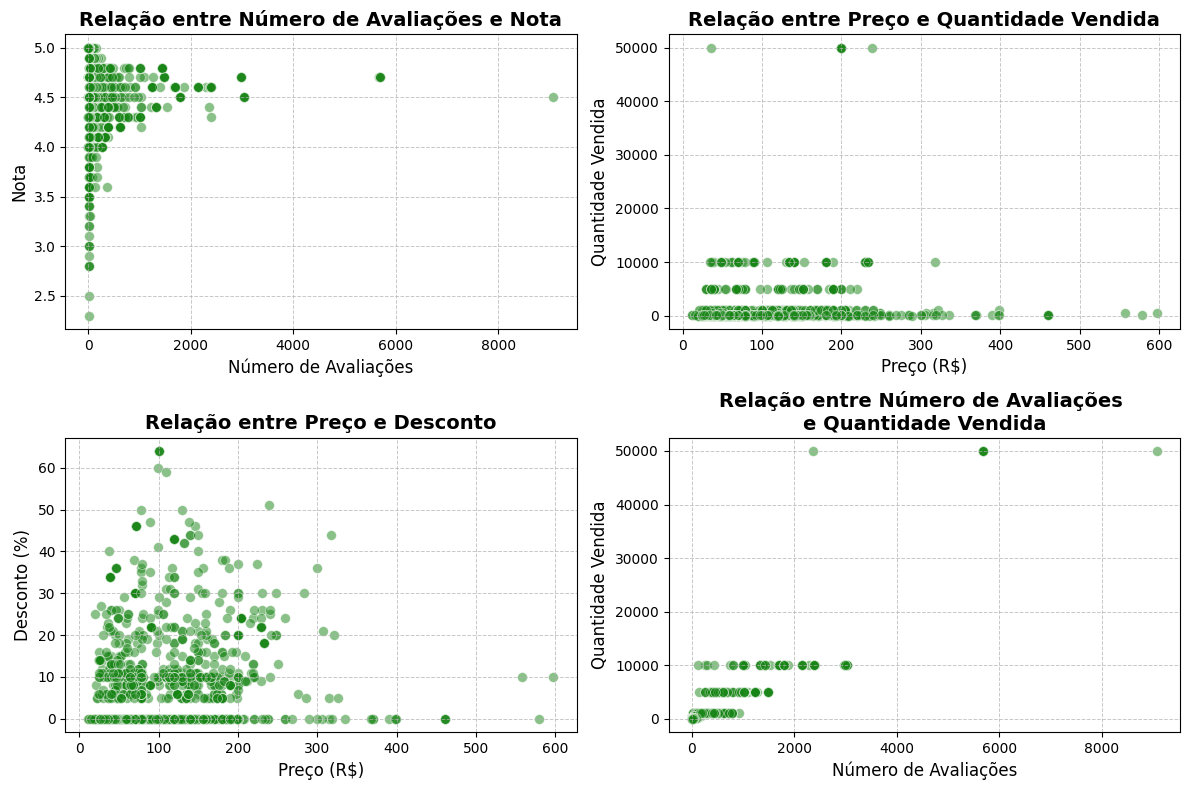

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(12, 8))

# Número de avaliações vs nota
plt.subplot(2, 2, 1)
sns.scatterplot(x='n_avaliações', y='nota', data=df, s=50, alpha=0.5, color='#178515')
plt.title('Relação entre Número de Avaliações e Nota', fontsize=14, fontweight='bold')
plt.xlabel('Número de Avaliações', fontsize=12, fontweight='medium')
plt.ylabel('Nota', fontsize=12, fontweight='medium')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Preço vs quantidade vendidos
plt.subplot(2, 2, 2)
sns.scatterplot(x='preço', y='qtd_vendidos', data=df, s=50, alpha=0.5, color='#178515')
plt.title('Relação entre Preço e Quantidade Vendida', fontsize=14, fontweight='bold')
plt.xlabel('Preço (R$)', fontsize=12, fontweight='medium')
plt.ylabel('Quantidade Vendida', fontsize=12, fontweight='medium')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Preço vs desconto
plt.subplot(2, 2, 3)
sns.scatterplot(x='preço', y='desconto', data=df, s=50, alpha=0.5, color='#178515')
plt.title('Relação entre Preço e Desconto', fontsize=14, fontweight='bold')
plt.xlabel('Preço (R$)', fontsize=12, fontweight='medium')
plt.ylabel('Desconto (%)', fontsize=12, fontweight='medium')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Número de avaliações vs quantidade vendida
plt.subplot(2, 2, 4)
sns.scatterplot(x='n_avaliações', y='qtd_vendidos', data=df, s=50, alpha=0.5, color='#178515')
plt.title('Relação entre Número de Avaliações \ne Quantidade Vendida', fontsize=14, fontweight='bold')
plt.xlabel('Número de Avaliações', fontsize=12, fontweight='medium')
plt.ylabel('Quantidade Vendida', fontsize=12, fontweight='medium')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

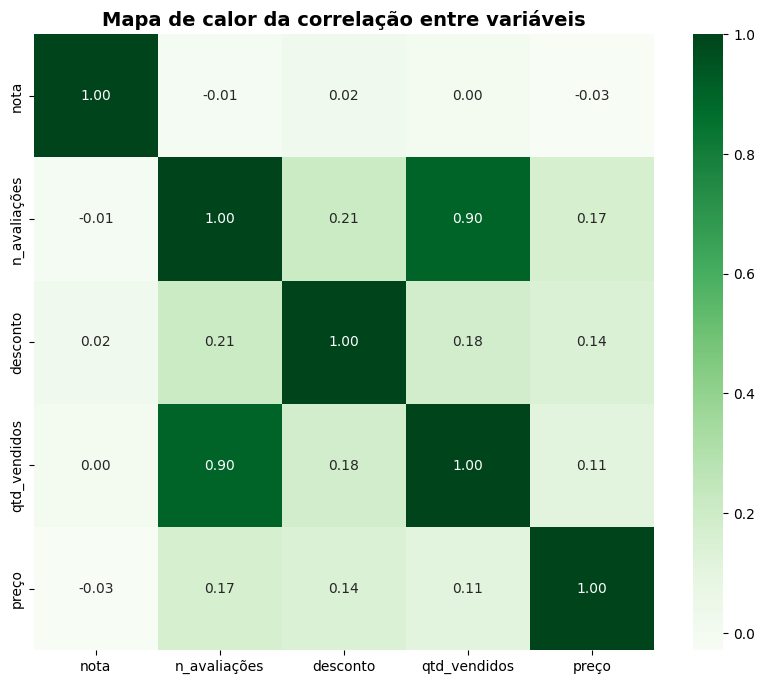

In [ ]:
# Mapa de calor
correlacao = df.select_dtypes(include=['float', 'int'])

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao.corr(), annot=True, fmt='.2f', cmap='Greens')
plt.title('Mapa de calor da correlação entre variáveis', fontsize=14, fontweight='bold')

plt.show()

Podemos observar uma **correlação forte, de 0,90, entre as variáveis n_avaliações e qtd_vendidos**.

Vamos aproveitar essa relação para a criação do **gráfico de regressão**, para visualizar melhor esse padrão.


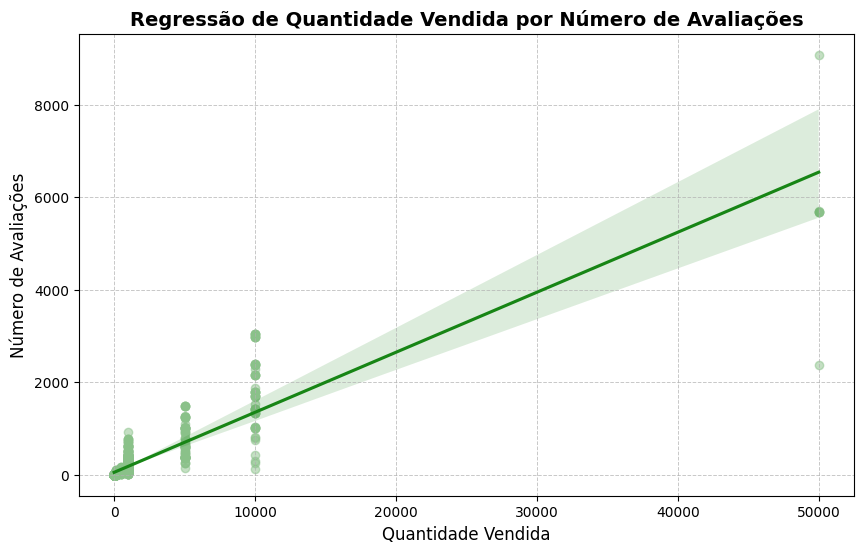

In [ ]:
# Gráfico de regressão
# Quantidade vendida vs número de avaliações
plt.figure(figsize=(10, 6))

sns.regplot(x='qtd_vendidos', y='n_avaliações', data=df, color='#178515', scatter_kws={'alpha': 0.5, 'color': '#8ac189'})
plt.title('Regressão de Quantidade Vendida por Número de Avaliações', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade Vendida', fontsize=12, fontweight='medium')
plt.ylabel('Número de Avaliações', fontsize=12, fontweight='medium')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

## Alguns insights

Apesar de não ser o foco principal do projeto, algumas observações relevantes podem ser feitas:

- Foram identificadas inconsistências no cadastro dos produtos, com muitas categorias que poderiam ser agrupadas e padronizadas para simplificar a catalogação.
- A maior parte dos produtos está concentrada em faixas de preço mais baixas, com pouco ou nenhum desconto.
- Há predominância de produtos voltados para o público feminino.
- A maioria dos produtos possui boa avaliação. Porém, também há casos de produtos bem avaliados com poucas vendas, o que pode indicar problemas de divulgação ou preço.
- Foi observada uma forte correlação entre o número de avaliações e a quantidade de vendas, o que reforça a influência das avaliações na decisão de compra.

## Observações

Este projeto foi desenvolvido com foco didático e tem como principal objetivo a prática de técnicas de visualização. Por isso, decisões de limpeza e análise foram feitas de forma simples, priorizando o aprendizado.